### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Carregando os dados

In [3]:
# Carrega todos o s dataframes em que vamos trabalhar
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Colocando todos dentro de uma lista
lojas = []
lojas.append(pd.read_csv(url1))
lojas.append(pd.read_csv(url2))
lojas.append(pd.read_csv(url3))
lojas.append(pd.read_csv(url4))

lojas[0].head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


##### Convertendo os dados

In [5]:
# Convertendo a data de compra em date
for loja in lojas:
  loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], dayfirst=True)

# Adicionando a coluna Ano
for loja in lojas:
  loja["Ano"] = loja["Data da Compra"].dt.year

# Adicionando a coluna Mes
for loja in lojas:
  loja["Mes"] = loja["Data da Compra"].dt.month

# Cálculo a coluna Faturamento (preço + frete)
for loja in lojas:
  loja["Faturamento"] = loja["Preço"] + loja["Frete"]


#1. Análise do faturamento


### Faturamento total
<p>Agrupei os dados por ano e somou os faturamentos de cada loja individualmente. Isso permitiu:<p>

- Verificar a performance de cada loja ao longo dos anos.

- Comparar o crescimento ou queda no faturamento.

In [6]:

count = 1
for loja in lojas:
  faturamento_total = loja["Faturamento"].sum()
  print(f"Faturamento total da loja {count} : R$ {faturamento_total:,.2f}")
  count +=1


Faturamento total da loja 1 : R$ 1,616,347.09
Faturamento total da loja 2 : R$ 1,567,773.22
Faturamento total da loja 3 : R$ 1,542,047.69
Faturamento total da loja 4 : R$ 1,458,253.46


##### Faturamento por ano

In [9]:
faturamento_por_ano = []
for fat in lojas:
  faturamento_por_ano.append(fat.groupby(fat["Ano"])["Faturamento"].sum())


#### Reestruturei os dados em um DataFrame para exibir barras lado a lado por ano, comparando diretamente o faturamento anual entre lojas.

<Figure size 800x500 with 0 Axes>

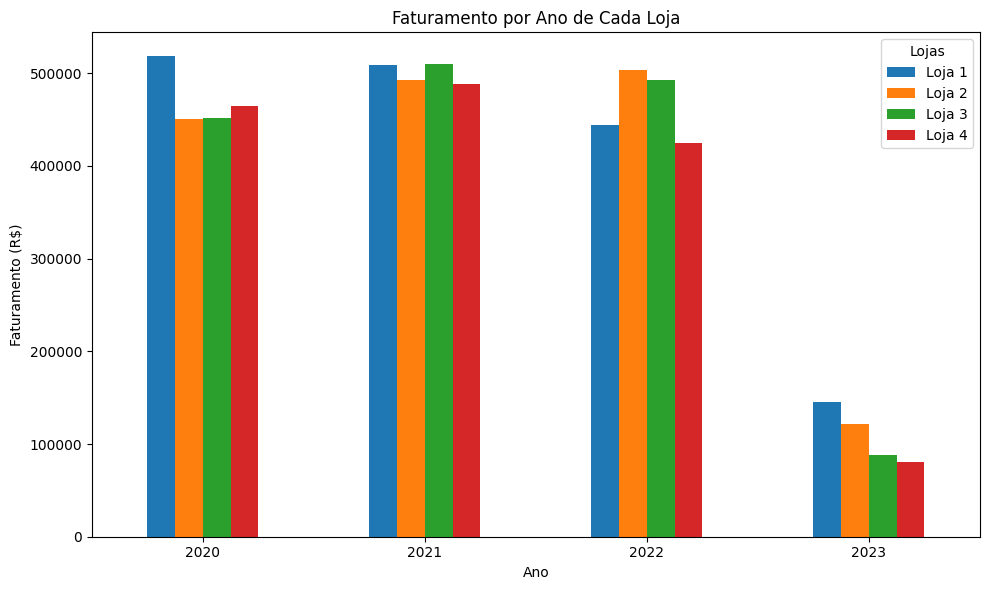

In [30]:
faturamento_df = pd.concat(faturamento_por_ano, axis=1)
faturamento_df.columns = [f"Loja {i+1}" for i in range(len(faturamento_por_ano))]

# Plotar gráfico de barras agrupadas
plt.figure(figsize=(8, 5))
faturamento_df.plot(kind="bar", figsize=(10, 6))
plt.title("Faturamento por Ano de Cada Loja")
plt.xlabel("Ano")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=0)
plt.legend(title="Lojas")
plt.tight_layout()
plt.show()


#### Quem teve o melhor faturamento a cada ano?

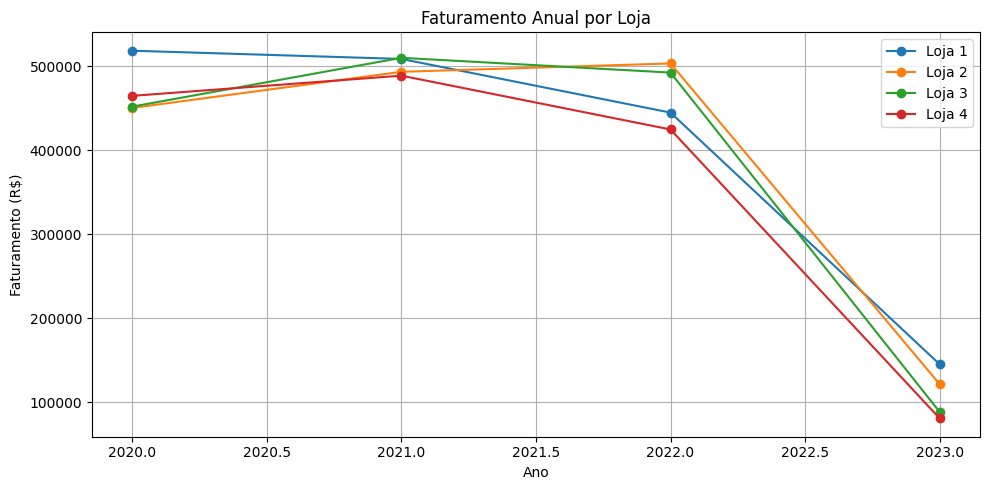

In [23]:
# Plotar todos no mesmo gráfico
plt.figure(figsize=(10, 5))
for i in range(4):
  faturamento_por_ano[i].plot(label=f"Loja {i+1}", marker='o')

# Gráfico de linhas
plt.title("Faturamento Anual por Loja")
plt.xlabel("Ano")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


### Fiz uma análise da quantidade de vendas por categoria, agrupando e visualizando com gráficos de barra.

#### O que isso ajuda a entender?

- Quais categorias têm maior saída.

- O comportamento do consumidor por tipo de produto.

In [24]:
faturamento_categorias = []
count = 0

for loja in lojas:
  faturamento_categorias.append(loja.groupby("Categoria do Produto")["Faturamento"].sum().sort_values(ascending=False))
  count += 1

  print(f"\nFaturamento por categoria da loja {count}:")
  print(loja)




Faturamento por categoria da loja 1:
                    Produto Categoria do Produto    Preço      Frete  \
0        Assistente virtual          eletronicos   219.08   9.249790   
1            Mesa de jantar               moveis   256.35  11.234305   
2         Jogo de tabuleiro           brinquedos   279.51  21.262681   
3               Micro-ondas     eletrodomesticos  1009.99  54.667344   
4     Cadeira de escritório               moveis   446.99  26.964689   
...                     ...                  ...      ...        ...   
2354       Celular Plus X42          eletronicos  1712.54  88.772042   
2355             Impressora          eletronicos   377.02  20.363958   
2356      Jogo de tabuleiro           brinquedos   163.82   9.611337   
2357               Cama box               moveis   921.77  46.665919   
2358             Smartwatch          eletronicos   259.95  11.425995   

     Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0        2021-01-16  

#### Gráficos

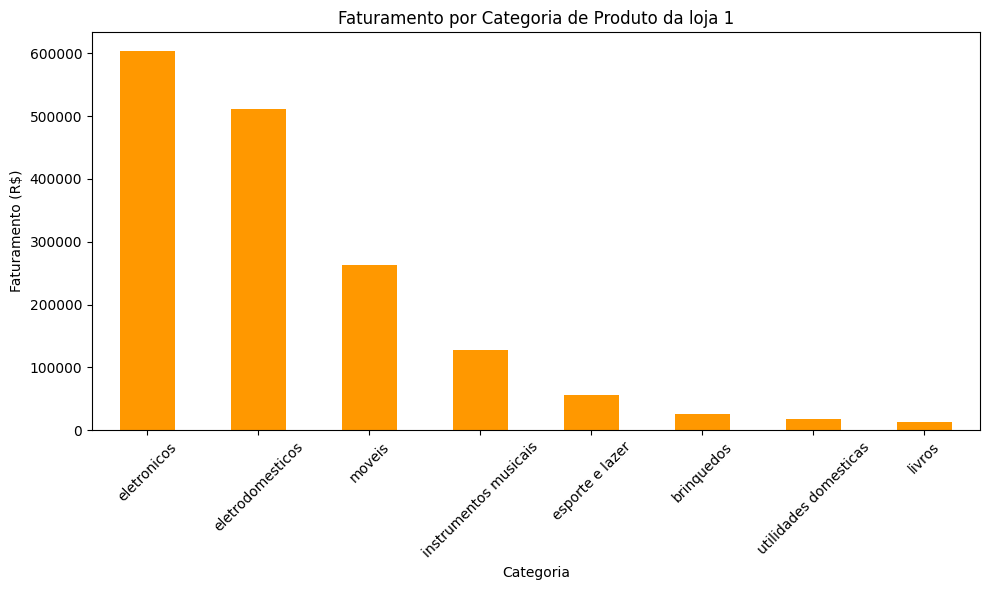

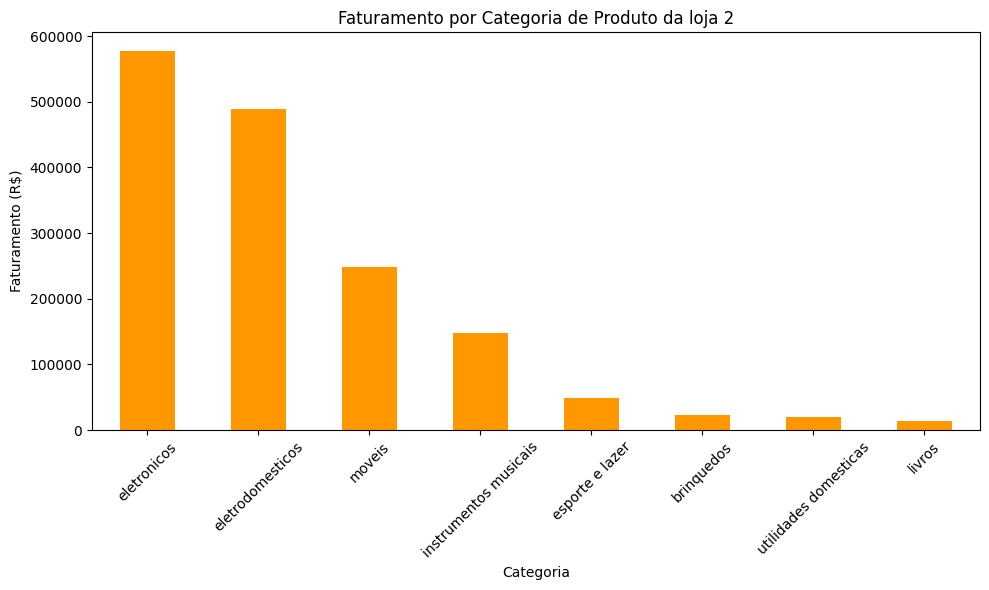

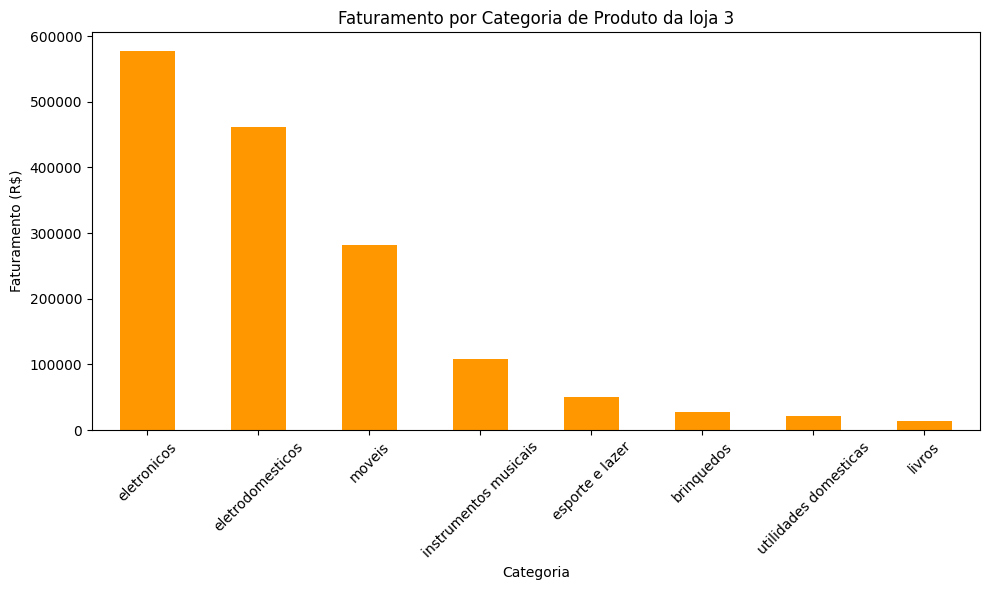

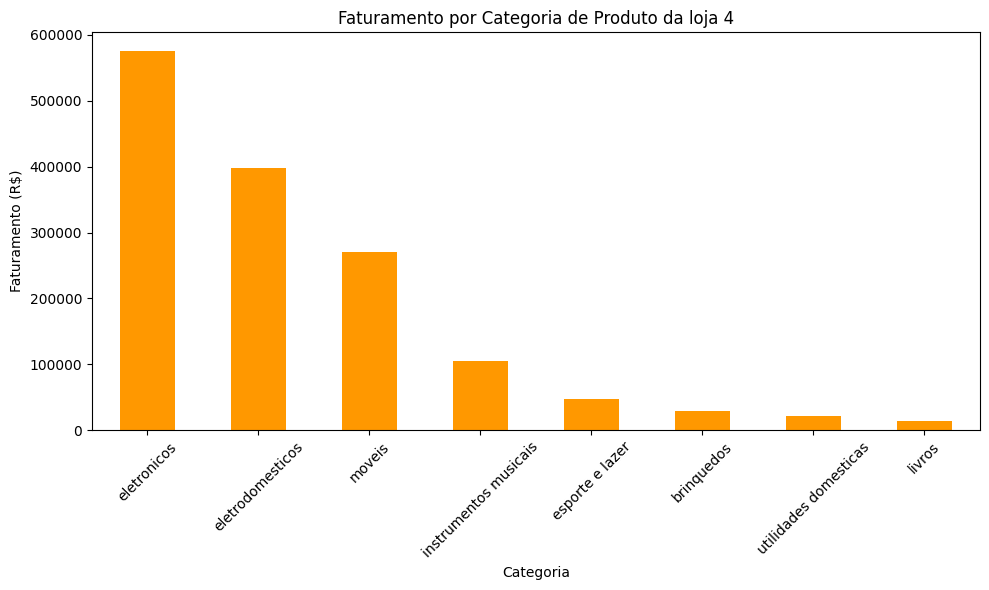

In [25]:
# Gráfico
count = 1
for categoria in faturamento_categorias:
  plt.figure(figsize=(10, 6))
  categoria.plot(kind="bar", color="#FF9800")
  plt.title(f"Faturamento por Categoria de Produto da loja {count}")
  plt.xlabel("Categoria")
  plt.ylabel("Faturamento (R$)")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
  count += 1

# 3. Média de Avaliação das Lojas

### Analisei as avaliações dos clientes por loja:

- Ajuda a entender o calculo da média de avaliação de cada loja.

- Compara as notas com gráficos de barra para identificar a melhor avaliada.

In [26]:
media_lojas = []
count = 0
for loja in lojas:
  media_lojas.append(loja["Avaliação da compra"].mean())
  print(f"A avaliação de compra da loja {count + 1}: {media_lojas[count]}")
  count += 1


A avaliação de compra da loja 1: 3.976685036032217
A avaliação de compra da loja 2: 4.037303942348453
A avaliação de compra da loja 3: 4.048325561678677
A avaliação de compra da loja 4: 3.9957591178965224


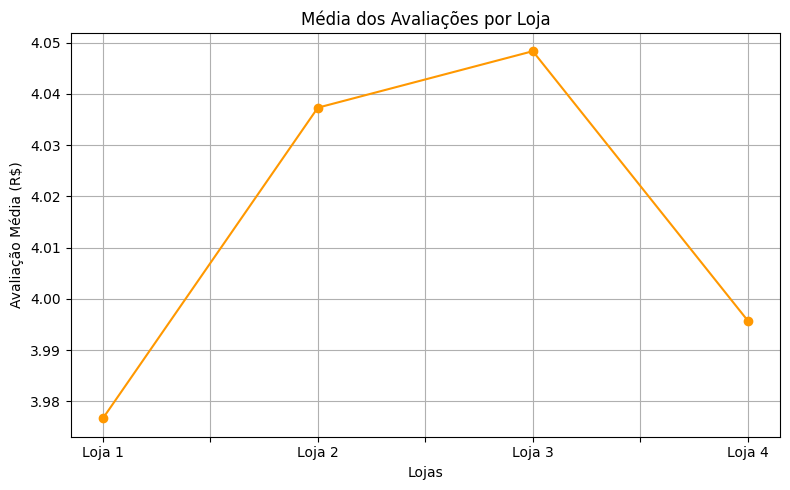

In [21]:
# Criar uma Series com o nome das lojas
media_series = pd.Series(media_lojas, index=[f"Loja {i+1}" for i in range(len(media_lojas))])

# Plotar gráfico de linha
plt.figure(figsize=(8, 5))
media_series.plot(kind="line", marker='o', linestyle='-', color="#FF9800")
plt.title("Média dos Avaliações por Loja")
plt.xlabel("Lojas")
plt.ylabel("Avaliação Média (R$)")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

#### Ótimo para Identificar os produtos campeões de vendas. Mostra também os menos vendidos, útil para estratégias de marketing ou descontinuação.

In [ ]:
produtos_lojas = []
count = 0
for loja in lojas:
  produtos_lojas.append(loja["Produto"].value_counts())

  print(f"LOJA {count + 1}")
  print(f"Produtos mais vendidos {produtos_lojas[count]}:\n")
  count += 1

LOJA 1
Produtos mais vendidos Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama king 

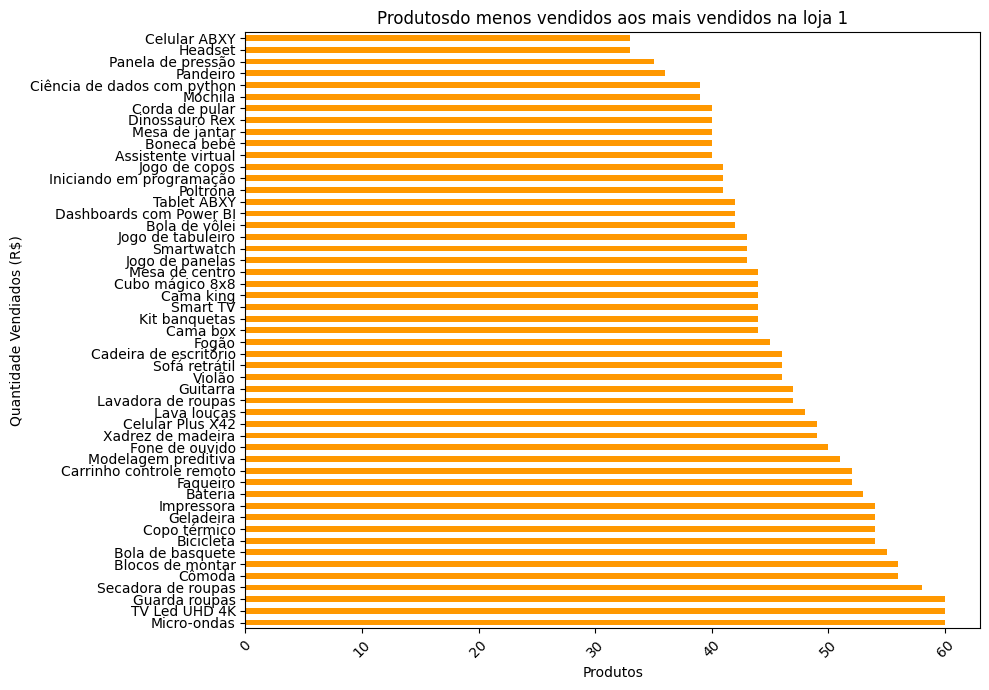

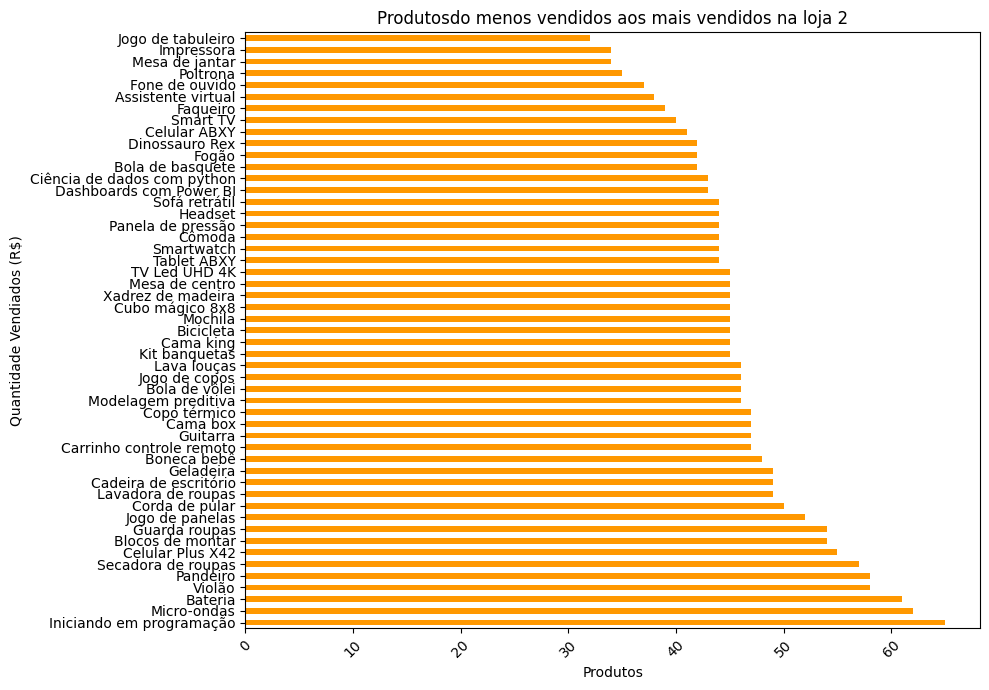

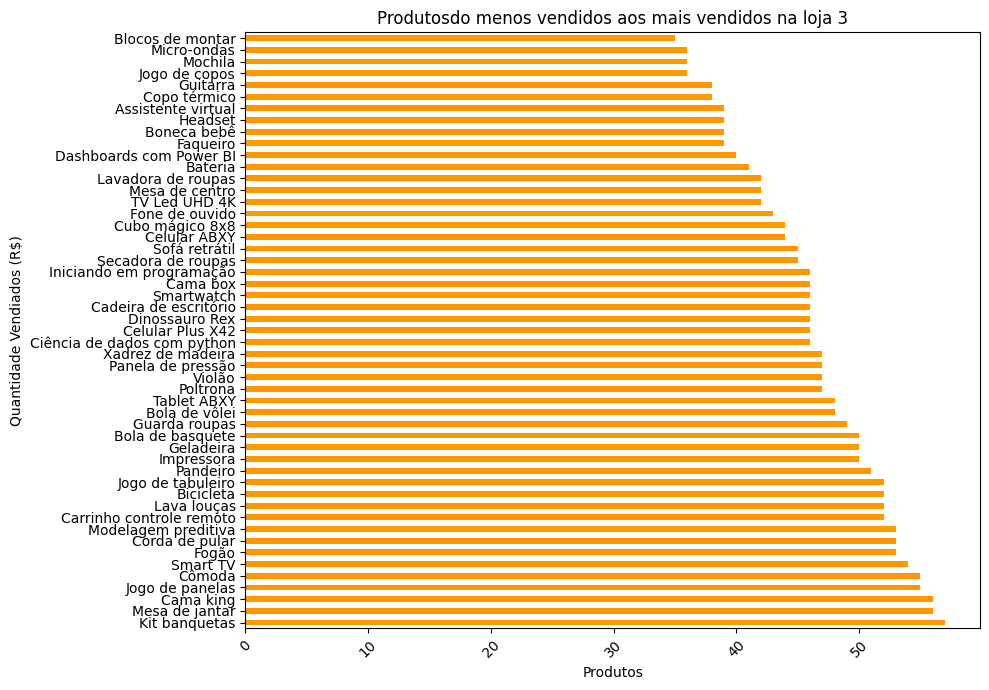

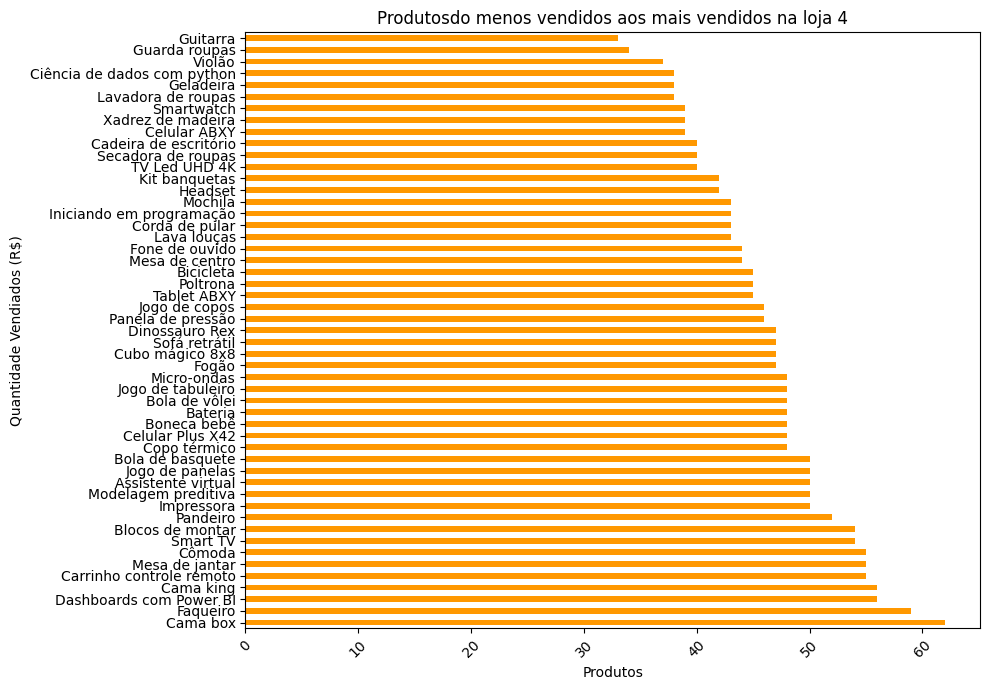

In [ ]:
# ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')
count = 1
for produtos_loja in produtos_lojas:
  plt.figure(figsize=(10, 7))
  produtos_loja.plot(kind="barh", color="#FF9800")
  plt.title(f"Produtosdo menos vendidos aos mais vendidos na loja {count}")
  plt.xlabel("Produtos")
  plt.ylabel("Quantidade Vendiados (R$)")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
  count += 1

# 5. Frete Médio por Loja


### Isto revela qual loja está com custos logísticos mais altos ou oferece mais subsídio ao cliente.

In [ ]:
frete_lojas = []

for loja in lojas:
  frete_lojas.append(loja['Frete'].mean())

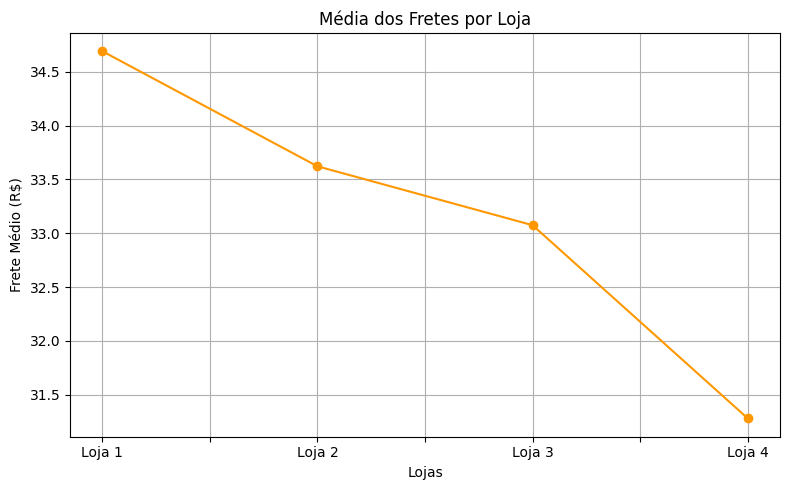

In [ ]:
# Criar uma Series com o nome das lojas
fretes_series = pd.Series(frete_lojas, index=[f"Loja {i+1}" for i in range(len(frete_lojas))])

# Plotar gráfico de linha
plt.figure(figsize=(8, 5))
fretes_series.plot(kind="line", marker='o', linestyle='-', color="#FF9800")
plt.title("Média dos Fretes por Loja")
plt.xlabel("Lojas")
plt.ylabel("Frete Médio (R$)")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()